# Logistic Regression with a Neural Network mindset

In [1]:
#import __init__
from logisticregression import LogisticRegression
from utils import dataloader
from utils import image
from utils import base

**Loading Dataset**

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = \
                              dataloader.load_dataset("../dataset/catvnotcat", 'catvnotcat')

**display a few examples**

y = 1


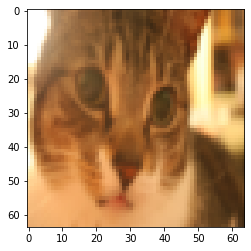

In [3]:
index = 200
image.display_image(train_set_x_orig[index], train_set_y[:,index][0])

**Train and Test size's + flatten + standardize dataset**

In [4]:
#`train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3), test is similar to this one too!
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print(f"m_train:{m_train},  m_test:{m_test},  num_px: {num_px}")

#flatten images into single vector
#train_set_x_flatten, test_set_x_flatten = image.flatten_X(train_set_x_orig), image.flatten_X(test_set_x_orig)

#or just simply use standarze_dataset to flatten and standardize it using x/255
train_set_x, test_set_x = image.standardize_dataset(train_set_x_orig), image.standardize_dataset(test_set_x_orig)

print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x[0:5,0]))


m_train:209,  m_test:50,  num_px: 64
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]


**Train Model**

In [6]:
model = LogisticRegression()

params = model.fit(train_set_x, train_set_y, test_set_x, test_set_y, 
                  num_iterations = 2000, learning_rate = 0.004, verbose = True,
                  output_pretrained_parameters = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.506765
Cost after iteration 200: 0.442269
Cost after iteration 300: 0.397201
Cost after iteration 400: 0.362439
Cost after iteration 500: 0.334271
Cost after iteration 600: 0.310725
Cost after iteration 700: 0.290608
Cost after iteration 800: 0.273138
Cost after iteration 900: 0.257771
Cost after iteration 1000: 0.244114
Cost after iteration 1100: 0.231873
Cost after iteration 1200: 0.220823
Cost after iteration 1300: 0.210787
Cost after iteration 1400: 0.201623
Cost after iteration 1500: 0.193217
Cost after iteration 1600: 0.185474
Cost after iteration 1700: 0.178317
Cost after iteration 1800: 0.171678
Cost after iteration 1900: 0.165504
train accuracy: 98.08612440191388 %
test accuracy: 70.0 %


In [7]:
## display model parameters
params

{'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0.]]),
 'Y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
         0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
         1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 

**plot cost**

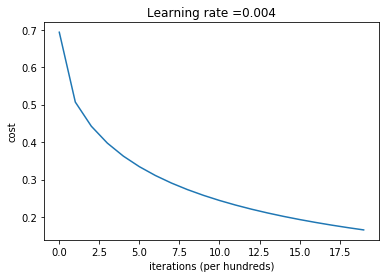

In [8]:
base.plot_cost_function(params['costs'], params['learning_rate'])

**Test with new image**

In [9]:
#not a cat
model.predict_by_image("images/img2.jpg")

array([0.])

In [10]:
# a cat
model.predict_by_image("images/img1.jpg")

array([1.])